In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.model_selection import train_test_split

In [46]:
import Module.Loan_Modules as Loan_Modules

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
data = pd.read_csv('processed_loan_data_v3.csv')

In [49]:
data.shape

(973534, 95)

# One-Hot Encoder

In [50]:
dummy_list = ['applicationtype', 'verificationstatus', 'homeownership', 'grade',
               'initialliststatus', 'purpose']

In [51]:
dummy_enconded = pd.get_dummies(data[dummy_list])

In [52]:
continuous_list = list(set(data.columns.tolist()) - set(dummy_list))

In [53]:
df_modeling = pd.concat([data[continuous_list], dummy_enconded], axis=1)

In [54]:
df_modeling.head()

,19_Unemploy,ilutil,Zip_Mean_mean,ficorangelow,intrate,subgrade,term,18_Unemploy,loanamnt,numtloppast12m,dti,mortacc,mthssincelastdelinq,ARM_APR,mosinoldrevtlop,diff_crline_issue,emplength,15_fixed_APR,totalbalexmort,percentbcgt75,emptitle_chargeoff_pct,numactvbctl,numsats,totalilhighcreditlimit,inqlast6mths,numbctl,mthssincerecentrevoldelinq,issued,inqlast12m,Zip_Median_max,Zip_Median_mean,Zip_Pop_max,numrevaccts,bcopentobuy,zip_freq,Zip_Mean_min,pcttlnvrdlq,mosinoldilacct,openactil,totalbalil,tothicredlim,maxbalbc,Zip_Mean_max,annualinc,installment,delinq2yrs,Zip_Pop_min,numoprevtl,delinqamnt,mthssincerecentbc,totalacc,totcurbal,revolutil,revolbal,mosinrcnttl,openacc6m,pubrec,Zip_Pop_mean,30_fixed_APR,Unnamed: 0,addrstate,accopenpast24mths,bcutil,pubrecbankruptcies,totalbclimit,numiltl,ficorangehigh,mosinrcntrevtlop,openacc,fundedamnt,openil24m,Zip_Median_min,trainflag,totcollamt,mthssincercntil,openrv24m,openil12m,loanstatus,totalrevhilim,openrv12m,totalcutl,avgcurbal,mthssincerecentinq,inqfi,allutil,numactvrevtl,numacctsever120pd,numbcsats,numrevtlbalgt0,applicationtype_Individual,applicationtype_Joint App,verificationstatus_Not Verified,verificationstatus_Verified,homeownership_ANY,homeownership_MORTGAGE,homeownership_NONE,homeownership_OWN,homeownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_other,initialliststatus_f,initialliststatus_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_other,purpose_wedding
0,4.3,88.0,81104.095238,660.0,17.97,D1,36.0,4.0,15000.0,2.0,38.53,1.0,8.0,4.87,157.0,4960.0,5.0,3.91,101680.0,20.0,18.277712,5.0,9.0,39309.0,0.0,6.0,24.0,2019-03-01,2.0,91371.0,66861.190476,76615.0,10.0,12317.0,25.33,49482.0,88.9,163.0,2.0,34645.0,336009.0,13753.0,112700.0,58240.0,542.07,1.0,456.0,6.0,0.0,10.0,18.0,271606.0,66.4,67035.0,7.0,0.0,0.0,29381.333333,4.39,0,CA,6.0,66.4,0.0,36700.0,7.0,664.0,10.0,9.0,15000.0,3.0,41960.0,1,0.0,7.0,3.0,1.0,0.0,116700.0,1.0,2.0,30178.0,7.0,4.0,78.0,6.0,1.0,5.0,6.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,3.9,82.0,77629.333333,665.0,17.19,C5,36.0,3.4,3025.0,3.0,11.88,3.0,27.0,4.87,149.0,4991.0,3.0,3.91,19021.0,100.0,27.031250,2.0,9.0,19781.0,0.0,5.0,82.0,2019-03-01,1.0,113142.0,64101.966667,80241.0,12.0,59.0,81.29,40660.0,90.9,164.0,3.0,16136.0,26381.0,1530.0,134286.0,30000.0,108.14,0.0,342.0,6.0,0.0,9.0,22.0,19021.0,43.7,2885.0,7.0,0.0,0.0,36131.333333,4.39,1,GA,5.0,97.6,0.0,2500.0,7.0,669.0,7.0,9.0,3025.0,1.0,31087.0,1,0.0,16.0,4.0,0.0,0.0,6600.0,3.0,1.0,2378.0,7.0,1.0,72.0,4.0,1.0,2.0,4.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,3.8,113.0,56843.941176,680.0,16.40,C4,36.0,3.5,2000.0,2.0,20.86,0.0,31.0,4.87,43.0,3468.0,3.0,3.91,124465.0,50.0,18.814192,3.0,22.0,96588.0,1.0,4.0,32.0,2019-03-01,2.0,108193.0,50318.529412,44314.0,8.0,13357.0,20.31,0.0,100.0,114.0,15.0,109166.0,140588.0,5017.0,125882.0,53000.0,70.71,0.0,18.0,7.0,0.0,20.0,44.0,124465.0,34.8,15299.0,5.0,1.0,0.0,10388.137255,4.39,2,TX,6.0,43.9,0.0,23800.0,36.0,684.0,5.0,22.0,2000.0,1.0,20289.0,1,0.0,8.0,5.0,1.0,0.0,44000.0,1.0,0.0,5658.0,5.0,1.0,89.0,5.0,0.0,4.0,5.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,4.3,80.0,84724.138889,690.0,14.74,C2,60.0,4.0,18500.0,3.0,25.48,1.0,24.0,4.87,520.0,15826.0,1.0,3.91,128960.0,75.0,28.029171,6.0,20.0,106758.0,1.0,12.0,32.0,2019-03-01,2.0,165764.0,73459.055556,75611.0,25.0,17275.0,56.86,0.0,94.7,171.0,3.0,66285.0,326958.0,19786.0,198977.0,144000.0,437.60,0.0,550.0,16.0,0.0,1.0,40.0,230990.0,74.4,62675.0,1.0,2.0,0.0,35312.722222,4.39,3,CA,4.0,77.3,0.0,76000.0,14.0,694.0,1.0,20.0,18500.0,2.0,24432.0,1,0.0,2.0,2.0,1.0,1.0,84200.0,2.0,0.0,12833.0,1.0,1.0,76.0,10.0,0.0,8.0,10.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,4.1,73.0,61749.615385,665.0,20.00,D2,36.0,4.0,5000.0,0.0,6.46,0.0,21.0,4.87,143.0,4352.0,1.0,3.91,1719.0,25.0,17.119070,4.0,4.0,0.0,0.0,7.0,21.0,2019-03-01,0.0,92175.0,47011.948718,106461.0,7.0,781.0,123.65,33975.0,50.0,129.0,0.0,0.0,2500.0,618.0,140858.0,42000.0,185.82,4.0,3040.0,4.0,0.0,27.0,8.0,1719

In [55]:
df_modeling.drop(columns=['addrstate', 'subgrade'], inplace = True)

# Split into in-time training set and out-of-time testing set

In [56]:
issued=list(df_modeling['issued'].unique())

## Training set: < 2019-01-01 

In [57]:
df_train = df_modeling.loc[(df_modeling['trainflag']== 1) & (df_modeling['issued'] < '2019-01-01'), :]
df_train.shape

(914318, 109)

In [58]:
df_train.head()

,19_Unemploy,ilutil,Zip_Mean_mean,ficorangelow,intrate,term,18_Unemploy,loanamnt,numtloppast12m,dti,mortacc,mthssincelastdelinq,ARM_APR,mosinoldrevtlop,diff_crline_issue,emplength,15_fixed_APR,totalbalexmort,percentbcgt75,emptitle_chargeoff_pct,numactvbctl,numsats,totalilhighcreditlimit,inqlast6mths,numbctl,mthssincerecentrevoldelinq,issued,inqlast12m,Zip_Median_max,Zip_Median_mean,Zip_Pop_max,numrevaccts,bcopentobuy,zip_freq,Zip_Mean_min,pcttlnvrdlq,mosinoldilacct,openactil,totalbalil,tothicredlim,maxbalbc,Zip_Mean_max,annualinc,installment,delinq2yrs,Zip_Pop_min,numoprevtl,delinqamnt,mthssincerecentbc,totalacc,totcurbal,revolutil,revolbal,mosinrcnttl,openacc6m,pubrec,Zip_Pop_mean,30_fixed_APR,Unnamed: 0,accopenpast24mths,bcutil,pubrecbankruptcies,totalbclimit,numiltl,ficorangehigh,mosinrcntrevtlop,openacc,fundedamnt,openil24m,Zip_Median_min,trainflag,totcollamt,mthssincercntil,openrv24m,openil12m,loanstatus,totalrevhilim,openrv12m,totalcutl,avgcurbal,mthssincerecentinq,inqfi,allutil,numactvrevtl,numacctsever120pd,numbcsats,numrevtlbalgt0,applicationtype_Individual,applicationtype_Joint App,verificationstatus_Not Verified,verificationstatus_Verified,homeownership_ANY,homeownership_MORTGAGE,homeownership_NONE,homeownership_OWN,homeownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_other,initialliststatus_f,initialliststatus_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_other,purpose_wedding
59183,4.0,113.0,81784.655172,660.0,23.87,36.0,3.9,14100.0,3.0,14.12,3.0,19.0,NaN,138.0,4656.0,1.0,NaN,126106.0,40.0,13.717085,4.0,12.0,101375.0,0.0,6.0,33.0,2018-03-01,2.0,148850.0,62507.103448,46232.0,6.0,6650.0,31.83,31253.0,70.0,153.0,6.0,114956.0,326745.0,6651.0,246234.0,128000.0,552.23,1.0,832.0,5.0,0.0,2.0,32.0,329317.0,62.6,11150.0,1.0,2.0,0.0,21713.137931,NaN,59183,4.0,62.6,0.0,17800.0,23.0,664.0,2.0,12.0,14100.0,2.0,24984.0,1,358.0,1.0,1.0,1.0,0.0,17800.0,1.0,0.0,27443.0,0.0,4.0,106.0,4.0,5.0,5.0,4.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
59184,4.1,86.0,72255.200000,690.0,14.07,60.0,4.0,20000.0,3.0,11.40,0.0,31.0,NaN,163.0,5630.0,10.0,NaN,30448.0,100.0,18.814192,4.0,12.0,12000.0,0.0,11.0,32.0,2018-03-01,1.0,82291.0,58070.400000,54005.0,23.0,1924.0,6.75,51204.0,100.0,185.0,1.0,10272.0,55700.0,9510.0,101500.0,92000.0,466.10,0.0,4206.0,11.0,0.0,3.0,36.0,30448.0,46.2,20176.0,3.0,1.0,0.0,20896.000000,NaN,59184,5.0,91.3,0.0,22100.0,13.0,694.0,3.0,12.0,20000.0,1.0,35645.0,1,0.0,7.0,4.0,1.0,1.0,43700.0,2.0,0.0,2537.0,7.0,1.0,55.0,4.0,0.0,4.0,4.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
59185,3.8,102.0,72470.173077,695.0,11.98,36.0,3.5,7000.0,2.0,20.25,0.0,60.0,NaN,132.0,4018.0,1.0,NaN,131726.0,33.3,6.449937,2.0,13.0,118917.0,0.0,4.0,60.0,2018-03-01,4.0,168365.0,53600.230769,39056.0,10.0,4996.0,11.87,29326.0,89.7,122.0,6.0,126722.0,132817.0,3944.0,291112.0,40000.0,232.44,0.0,23.0,7.0,0.0,10.0,29.0,131726.0,36.0,5004.0,1.0,1.0,0.0,7680.788462,NaN,59185,4.0,50.0,0.0,10000.0,19.0,699.0,1.0,13.0,7000.0,2.0,16773.0,1,0.0,16.0,2.0,0.0,0.0,13900.0,2.0,1.0,10977.0,5.0,2.0,90.0,2.0,3.0,3.0,2.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
59186,4.1,73.0,62337.800000,665.0,20.39,60.0,4.0,21000.0,4.0,15.76,3.0,2.0,NaN,112.0,3407.0,10.0,NaN,51667.0,16.7,20.705619,5.0,15.0,39733.0,0.0,10.0,2.0,2018-03-01,13.0,67831.0,49970.400000,35933.0,21.0,16684.0,1.69,44172.0,92.6,67.0,1.0,37076.0,172433.0,5354.0,86678.0,85000.0,560.94,1.0,820.0,12.0,0.0,4.0,27.0,128270.0,34.2,14591.0,4.0,1.0,0.0,14709.000000,NaN,59186,8.0,38.4,0.0,27100.0,3.0,669.0,4.0,15.0,21000.0,2.0,32334.0,1,0.0,7.0,5.0,2.0,0.0,42700.0,2.0,4.0,8551.0,0.0,6.0,34.0,7.0,0.0,6.0,7.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
59187,4.1,41.0,95818.764706,730.0,9.43,60.0,4.0,40000.0,0.0,4.09,0.0,31.0,NaN,259.0,7882.0,10.0,NaN,15615.0,0.0,17.915777,2.0,6.0,27755.0,0.0,6.0,32.0,2018-03-01,0.0,138152.0,75009.352941,61035.0,8.0,39827.0,15.39,48376.0,100.0,47.0,1.0,11242.0,74455.0,2647.0,201445.0,150000.0,838.71,0.0,315.0,5.0,0.0,21.0,9.0,156

## Testing set: >= 2019-01-01

In [59]:
df_test = df_modeling.loc[(df_modeling['trainflag']== 1) & (df_modeling['issued'] >= '2019-01-01'), :]
df_test.shape

(59183, 109)

# Create prediction dataset

In [60]:
df_pred = df_modeling.loc[df_modeling['trainflag']== 0, :]
df_pred.shape

(33, 109)

# Preliminary modeling - using XGBoost
Why XBGoost
High performance
It is an efficient implementation of the stochastic gradient boosting algorithm and offers a range of hyperparameters that give fine-grained control over the model training procedure. Although the algorithm performs well in general, even on imbalanced classification datasets, it offers a way to tune the training algorithm to pay more attention to misclassification of the minority class for datasets with a skewed class distribution.

This modified version of XGBoost is referred to as Class Weighted XGBoost or Cost-Sensitive XGBoost and can offer better performance on binary classification problems with a severe class imbalance.

In [61]:
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [62]:
## Estimate scal_pos_weight based on training data 
scale_pos_weight = (df_train['loanstatus'] == 0).sum()/(df_train['loanstatus'] == 1).sum()
scale_pos_weight

3.7564988945246456

In [63]:
feat = list(set(df_train.columns.tolist())-set(['loanstatus', 'trainflag', 'issued', 'Unnamed: 0']))

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2020, stratify = df_train.loanstatus)

In [65]:
X_train.head()

,19_Unemploy,ilutil,Zip_Mean_mean,ficorangelow,intrate,term,18_Unemploy,loanamnt,numtloppast12m,dti,grade_other,mortacc,mthssincelastdelinq,ARM_APR,mosinoldrevtlop,purpose_other,diff_crline_issue,homeownership_MORTGAGE,homeownership_OWN,emplength,15_fixed_APR,totalbalexmort,percentbcgt75,emptitle_chargeoff_pct,numactvbctl,numsats,totalilhighcreditlimit,inqlast6mths,numbctl,mthssincerecentrevoldelinq,inqlast12m,Zip_Median_max,Zip_Median_mean,Zip_Pop_max,grade_D,numrevaccts,bcopentobuy,grade_C,zip_freq,Zip_Mean_min,pcttlnvrdlq,mosinoldilacct,purpose_credit_card,openactil,totalbalil,tothicredlim,maxbalbc,Zip_Mean_max,annualinc,installment,delinq2yrs,Zip_Pop_min,numoprevtl,delinqamnt,mthssincerecentbc,totalacc,totcurbal,purpose_wedding,revolutil,verificationstatus_Verified,initialliststatus_w,applicationtype_Joint App,homeownership_RENT,revolbal,mosinrcnttl,openacc6m,pubrec,Zip_Pop_mean,30_fixed_APR,accopenpast24mths,purpose_educational,verificationstatus_Not Verified,bcutil,pubrecbankruptcies,totalbclimit,numiltl,ficorangehigh,mosinrcntrevtlop,openacc,fundedamnt,openil24m,Zip_Median_min,mthssincercntil,totcollamt,homeownership_ANY,openrv24m,openil12m,applicationtype_Individual,totalrevhilim,homeownership_NONE,openrv12m,initialliststatus_f,totalcutl,avgcurbal,purpose_debt_consolidation,grade_A,purpose_home_improvement,mthssincerecentinq,inqfi,allutil,grade_B,numactvrevtl,numacctsever120pd,numbcsats,numrevtlbalgt0
908672,4.1,78.0,69059.369565,720.0,6.99,36.0,3.6,8000.0,0.0,10.74,0,2.0,31.0,NaN,307.0,0,9376.0,0,1,3.0,NaN,33731.0,0.0,19.407468,1.0,10.0,33973.0,0.0,5.0,32.0,0.0,104505.0,55394.259259,54926.0,0,11.0,31941.0,0,14.60,34462.0,100.0,138.0,0,3.0,26338.0,287773.0,5759.0,137076.0,84000.0,246.99,0.0,92.0,6.0,0.0,201.0,21.0,228305.0,0,15.5,1,0,0,0,7393.0,13.0,0.0,0.0,17213.055556,NaN,3.0,0,0,15.3,0.0,37700.0,8.0,724.0,20.0,10.0,8000.0,1.0,25305.0,13.0,188.0,0,1.0,0.0,1,47800.0,0,0.0,1,0.0,22831.0,0,1,1,13.0,0.0,41.0,0,3.0,0.0,2.0,3.0
581464,3.6,93.0,53609.513889,665.0,12.99,36.0,3.5,24000.0,7.0,12.21,0,3.0,31.0,NaN,325.0,0,9890.0,0,0,1.0,NaN,75000.0,75.0,18.814192,4.0,13.0,67204.0,1.0,9.0,32.0,4.0,77179.0,43256.277778,11868.0,0,22.0,7290.0,1,1.94,1814.0,100.0,153.0,1,3.0,49838.0,103659.0,12438.0,92998.0,177000.0,808.54,0.0,25.0,9.0,0.0,15.0,32.0,75000.0,0,68.8,1,1,0,1,24907.0,3.0,3.0,2.0,1118.402778,NaN,10.0,0,0,71.7,2.0,25800.0,6.0,669.0,3.0,13.0,24000.0,2.0,1378.0,3.0,18485.0,0,7.0,2.0,1,36200.0,0,4.0,0,4.0,5769.0,0,0,0,3.0,3.0,76.0,0,8.0,0.0,4.0,8.0
238686,3.9,78.0,77629.333333,670.0,16.14,36.0,3.4,6650.0,3.0,15.66,0,0.0,56.0,NaN,272.0,0,8280.0,0,1,6.0,NaN,33284.0,100.0,6.449937,3.0,10.0,31500.0,2.0,13.0,56.0,2.0,113142.0,64101.966667,80241.0,0,19.0,1728.0,1,81.29,40660.0,80.0,148.0,0,4.0,24612.0,45000.0,2896.0,134286.0,125000.0,234.26,0.0,342.0,7.0,0.0,14.0,35.0,33284.0,0,64.2,0,1,0,0,8672.0,3.0,2.0,0.0,36131.333333,NaN,7.0,0,1,81.8,0.0,9500.0,16.0,674.0,6.0,11.0,6650.0,5.0,31087.0,3.0,0.0,0,2.0,2.0,1,13500.0,0,1.0,0,0.0,3026.0,1,0,0,0.0,4.0,74.0,0,4.0,7.0,3.0,4.0
262252,4.1,44.0,61749.615385,685.0,26.24,60.0,4.0,13700.0,0.0,2.94,1,0.0,51.0,NaN,115.0,0,5813.0,0,0,1.0,NaN,3449.0,0.0,17.282665,1.0,4.0,2625.0,0.0,3.0,51.0,0.0,92175.0,47011.948718,106461.0,0,7.0,4575.0,0,123.65,33975.0,71.4,191.0,0,1.0,1145.0,16025.0,425.0,140858.0,60000.0,412.14,0.0,3040.0,3.0,0.0,83.0,8.0,3449.0,0,17.2,1,1,0,1,2304.0,79.0,0.0,0.0,62714.333333,NaN,0.0,0,0,8.5,0.0,5000.0,1.0,689.0,79.0,4.0,13700.0,0.0,24882.0,191.0,0.0,0,0.0,0.0,1,13400.0,0,0.0,0,0.0,862.0,1,0,0,13.0,1.0,22.0,0,3.0,3.0,1.0,3.0
718971,2.6,82.0,66575.881356,760.0,11.47,60.0,2.4,20000.0,2.0,11.01,0,5.0,31.0,NaN,304.0,0,9283.0,1,0,10.0,NaN,83664.0,33.3,19.407468,2.0,8.0,49724.0,0.0,4.0,32.0,5.0,77360.0,53803.288136,15953.0,0,7.0,10722.0,0,1.79,49543.0,100.0,142.0,1,3.0,40986.0,315924.0,22597.0,102101.0,190000.0,439.56,0.0,20.0,4.0,0.0,41.0,22.0,278362.0,0,79.9,0,1,0,0,42678.0,9.0,0.0,0.0,1213.389831,NaN,3.0,0,1,67.9,0.0,33400.0,9.0,764.0,34.0,8.0,20000.0,3.0,39773.0,9.0,0.0,0,0.0,2.

In [66]:
df_test[feat].head()

,19_Unemploy,ilutil,Zip_Mean_mean,ficorangelow,intrate,term,18_Unemploy,loanamnt,numtloppast12m,dti,grade_other,mortacc,mthssincelastdelinq,ARM_APR,mosinoldrevtlop,purpose_other,diff_crline_issue,homeownership_MORTGAGE,homeownership_OWN,emplength,15_fixed_APR,totalbalexmort,percentbcgt75,emptitle_chargeoff_pct,numactvbctl,numsats,totalilhighcreditlimit,inqlast6mths,numbctl,mthssincerecentrevoldelinq,inqlast12m,Zip_Median_max,Zip_Median_mean,Zip_Pop_max,grade_D,numrevaccts,bcopentobuy,grade_C,zip_freq,Zip_Mean_min,pcttlnvrdlq,mosinoldilacct,purpose_credit_card,openactil,totalbalil,tothicredlim,maxbalbc,Zip_Mean_max,annualinc,installment,delinq2yrs,Zip_Pop_min,numoprevtl,delinqamnt,mthssincerecentbc,totalacc,totcurbal,purpose_wedding,revolutil,verificationstatus_Verified,initialliststatus_w,applicationtype_Joint App,homeownership_RENT,revolbal,mosinrcnttl,openacc6m,pubrec,Zip_Pop_mean,30_fixed_APR,accopenpast24mths,purpose_educational,verificationstatus_Not Verified,bcutil,pubrecbankruptcies,totalbclimit,numiltl,ficorangehigh,mosinrcntrevtlop,openacc,fundedamnt,openil24m,Zip_Median_min,mthssincercntil,totcollamt,homeownership_ANY,openrv24m,openil12m,applicationtype_Individual,totalrevhilim,homeownership_NONE,openrv12m,initialliststatus_f,totalcutl,avgcurbal,purpose_debt_consolidation,grade_A,purpose_home_improvement,mthssincerecentinq,inqfi,allutil,grade_B,numactvrevtl,numacctsever120pd,numbcsats,numrevtlbalgt0
0,4.3,88.0,81104.095238,660.0,17.97,36.0,4.0,15000.0,2.0,38.53,0,1.0,8.0,4.87,157.0,0,4960.0,1,0,5.0,3.91,101680.0,20.0,18.277712,5.0,9.0,39309.0,0.0,6.0,24.0,2.0,91371.0,66861.190476,76615.0,1,10.0,12317.0,0,25.33,49482.0,88.9,163.0,0,2.0,34645.0,336009.0,13753.0,112700.0,58240.0,542.07,1.0,456.0,6.0,0.0,10.0,18.0,271606.0,0,66.4,1,1,0,0,67035.0,7.0,0.0,0.0,29381.333333,4.39,6.0,0,0,66.4,0.0,36700.0,7.0,664.0,10.0,9.0,15000.0,3.0,41960.0,7.0,0.0,0,3.0,1.0,1,116700.0,0,1.0,0,2.0,30178.0,1,0,0,7.0,4.0,78.0,0,6.0,1.0,5.0,6.0
1,3.9,82.0,77629.333333,665.0,17.19,36.0,3.4,3025.0,3.0,11.88,0,3.0,27.0,4.87,149.0,0,4991.0,0,0,3.0,3.91,19021.0,100.0,27.031250,2.0,9.0,19781.0,0.0,5.0,82.0,1.0,113142.0,64101.966667,80241.0,0,12.0,59.0,1,81.29,40660.0,90.9,164.0,0,3.0,16136.0,26381.0,1530.0,134286.0,30000.0,108.14,0.0,342.0,6.0,0.0,9.0,22.0,19021.0,0,43.7,1,1,0,1,2885.0,7.0,0.0,0.0,36131.333333,4.39,5.0,0,0,97.6,0.0,2500.0,7.0,669.0,7.0,9.0,3025.0,1.0,31087.0,16.0,0.0,0,4.0,0.0,1,6600.0,0,3.0,0,1.0,2378.0,1,0,0,7.0,1.0,72.0,0,4.0,1.0,2.0,4.0
2,3.8,113.0,56843.941176,680.0,16.40,36.0,3.5,2000.0,2.0,20.86,0,0.0,31.0,4.87,43.0,1,3468.0,0,0,3.0,3.91,124465.0,50.0,18.814192,3.0,22.0,96588.0,1.0,4.0,32.0,2.0,108193.0,50318.529412,44314.0,0,8.0,13357.0,1,20.31,0.0,100.0,114.0,0,15.0,109166.0,140588.0,5017.0,125882.0,53000.0,70.71,0.0,18.0,7.0,0.0,20.0,44.0,124465.0,0,34.8,1,0,0,1,15299.0,5.0,1.0,0.0,10388.137255,4.39,6.0,0,0,43.9,0.0,23800.0,36.0,684.0,5.0,22.0,2000.0,1.0,20289.0,8.0,0.0,0,5.0,1.0,1,44000.0,0,1.0,1,0.0,5658.0,0,0,0,5.0,1.0,89.0,0,5.0,0.0,4.0,5.0
3,4.3,80.0,84724.138889,690.0,14.74,60.0,4.0,18500.0,3.0,25.48,0,1.0,24.0,4.87,520.0,0,15826.0,0,0,1.0,3.91,128960.0,75.0,28.029171,6.0,20.0,106758.0,1.0,12.0,32.0,2.0,165764.0,73459.055556,75611.0,0,25.0,17275.0,1,56.86,0.0,94.7,171.0,0,3.0,66285.0,326958.0,19786.0,198977.0,144000.0,437.60,0.0,550.0,16.0,0.0,1.0,40.0,230990.0,0,74.4,0,1,0,1,62675.0,1.0,2.0,0.0,35312.722222,4.39,4.0,0,1,77.3,0.0,76000.0,14.0,694.0,1.0,20.0,18500.0,2.0,24432.0,2.0,0.0,0,2.0,1.0,1,84200.0,0,2.0,0,0.0,12833.0,1,0,0,1.0,1.0,76.0,0,10.0,0.0,8.0,10.0
4,4.1,73.0,61749.615385,665.0,20.00,36.0,4.0,5000.0,0.0,6.46,0,0.0,21.0,4.87,143.0,1,4352.0,0,0,1.0,3.91,1719.0,25.0,17.119070,4.0,4.0,0.0,0.0,7.0,21.0,0.0,92175.0,47011.948718,106461.0,1,7.0,781.0,0,123.65,33975.0,50.0,129.0,0,0.0,0.0,2500.0,618.0,140858.0,42000.0,185.82,4.0,3040.0,4.0,0.0,27.0,8.0,1719.0,0,68.8,0,1,0,1,1719.0,27.0,0.0,0.0,62714.333333,4.39,0.0,0,1,68.8,0.0,2500.0,0.0,669.0,27.0,4.0,5000.0,0.0,24882.0,13.0,0.0,0,0.0,0.0,1,2500.0,0,0.0,0,0.0,

In [67]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [68]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

/home/yingjie/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/yingjie/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [69]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          "scale_pos_weight": 4.6,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": ['aucpr'],
          #"gamma": 1, 
          "min_child_weight": 5}

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 5000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-aucpr:0.366249	eval-aucpr:0.363191
Multiple eval metrics have been passed: 'eval-aucpr' will be used for early stopping.

Will train until eval-aucpr hasn't improved in 50 rounds.
[1]	train-aucpr:0.376205	eval-aucpr:0.372523
[2]	train-aucpr:0.389718	eval-aucpr:0.384811
[3]	train-aucpr:0.393059	eval-aucpr:0.38856
[4]	train-aucpr:0.39452	eval-aucpr:0.389823
[5]	train-aucpr:0.396004	eval-aucpr:0.391173
[6]	train-aucpr:0.396892	eval-aucpr:0.391903
[7]	train-aucpr:0.39691	eval-aucpr:0.391666
[8]	train-aucpr:0.396921	eval-aucpr:0.391702
[9]	train-aucpr:0.397631	eval-aucpr:0.39207
[10]	train-aucpr:0.398035	eval-aucpr:0.392283
[11]	train-aucpr:0.398495	eval-aucpr:0.392656
[12]	train-aucpr:0.399533	eval-aucpr:0.393401
[13]	train-aucpr:0.400651	eval-aucpr:0.394501
[14]	train-aucpr:0.400492	eval-aucpr:0.394342
[15]	train-aucpr:0.400536	eval-aucpr:0.394349
[16]	train-aucpr:0.400997	eval-aucpr:0.394705
[17]	train-aucpr:0.401158	eval-aucpr:0.394932
[18]	train-aucpr:0.402764	eval-aucpr:0.39

[175]	train-aucpr:0.447469	eval-aucpr:0.425787
[176]	train-aucpr:0.447618	eval-aucpr:0.42587
[177]	train-aucpr:0.447791	eval-aucpr:0.42591
[178]	train-aucpr:0.448005	eval-aucpr:0.426034
[179]	train-aucpr:0.448217	eval-aucpr:0.426133
[180]	train-aucpr:0.448372	eval-aucpr:0.426189
[181]	train-aucpr:0.448501	eval-aucpr:0.426251
[182]	train-aucpr:0.448658	eval-aucpr:0.42633
[183]	train-aucpr:0.448762	eval-aucpr:0.426356
[184]	train-aucpr:0.448897	eval-aucpr:0.426357
[185]	train-aucpr:0.448964	eval-aucpr:0.426402
[186]	train-aucpr:0.449048	eval-aucpr:0.426447
[187]	train-aucpr:0.449186	eval-aucpr:0.426533
[188]	train-aucpr:0.44936	eval-aucpr:0.426623
[189]	train-aucpr:0.449521	eval-aucpr:0.426689
[190]	train-aucpr:0.449604	eval-aucpr:0.426749
[191]	train-aucpr:0.449748	eval-aucpr:0.42683
[192]	train-aucpr:0.449853	eval-aucpr:0.426878
[193]	train-aucpr:0.449975	eval-aucpr:0.426919
[194]	train-aucpr:0.450109	eval-aucpr:0.426951
[195]	train-aucpr:0.450216	eval-aucpr:0.426978
[196]	train-aucpr:

[351]	train-aucpr:0.467398	eval-aucpr:0.431642
[352]	train-aucpr:0.467488	eval-aucpr:0.431657
[353]	train-aucpr:0.467591	eval-aucpr:0.431711
[354]	train-aucpr:0.467647	eval-aucpr:0.431735
[355]	train-aucpr:0.467749	eval-aucpr:0.431738
[356]	train-aucpr:0.467836	eval-aucpr:0.431732
[357]	train-aucpr:0.467914	eval-aucpr:0.431722
[358]	train-aucpr:0.467981	eval-aucpr:0.43172
[359]	train-aucpr:0.468004	eval-aucpr:0.431716
[360]	train-aucpr:0.468102	eval-aucpr:0.431741
[361]	train-aucpr:0.468194	eval-aucpr:0.431738
[362]	train-aucpr:0.468248	eval-aucpr:0.431745
[363]	train-aucpr:0.468293	eval-aucpr:0.431745
[364]	train-aucpr:0.468416	eval-aucpr:0.431768
[365]	train-aucpr:0.468507	eval-aucpr:0.431765
[366]	train-aucpr:0.468607	eval-aucpr:0.431781
[367]	train-aucpr:0.468723	eval-aucpr:0.431809
[368]	train-aucpr:0.468848	eval-aucpr:0.431835
[369]	train-aucpr:0.468923	eval-aucpr:0.43185
[370]	train-aucpr:0.468967	eval-aucpr:0.431865
[371]	train-aucpr:0.469012	eval-aucpr:0.431881
[372]	train-auc

[527]	train-aucpr:0.480952	eval-aucpr:0.433659
[528]	train-aucpr:0.481008	eval-aucpr:0.43369
[529]	train-aucpr:0.48109	eval-aucpr:0.433694
[530]	train-aucpr:0.481184	eval-aucpr:0.433727
[531]	train-aucpr:0.481282	eval-aucpr:0.433741
[532]	train-aucpr:0.48133	eval-aucpr:0.433739
[533]	train-aucpr:0.481415	eval-aucpr:0.43374
[534]	train-aucpr:0.48147	eval-aucpr:0.433753
[535]	train-aucpr:0.48154	eval-aucpr:0.433761
[536]	train-aucpr:0.481632	eval-aucpr:0.433768
[537]	train-aucpr:0.481696	eval-aucpr:0.433774
[538]	train-aucpr:0.481746	eval-aucpr:0.433782
[539]	train-aucpr:0.481833	eval-aucpr:0.433797
[540]	train-aucpr:0.481924	eval-aucpr:0.433801
[541]	train-aucpr:0.481964	eval-aucpr:0.433816
[542]	train-aucpr:0.482007	eval-aucpr:0.433807
[543]	train-aucpr:0.482074	eval-aucpr:0.43383
[544]	train-aucpr:0.482181	eval-aucpr:0.433837
[545]	train-aucpr:0.482209	eval-aucpr:0.433841
[546]	train-aucpr:0.482327	eval-aucpr:0.43387
[547]	train-aucpr:0.482394	eval-aucpr:0.433874
[548]	train-aucpr:0.4

[703]	train-aucpr:0.493766	eval-aucpr:0.434641
[704]	train-aucpr:0.493788	eval-aucpr:0.434653
[705]	train-aucpr:0.493835	eval-aucpr:0.434656
[706]	train-aucpr:0.493897	eval-aucpr:0.434656
[707]	train-aucpr:0.493998	eval-aucpr:0.434667
[708]	train-aucpr:0.494016	eval-aucpr:0.434661
[709]	train-aucpr:0.494077	eval-aucpr:0.434652
[710]	train-aucpr:0.4941	eval-aucpr:0.434655
[711]	train-aucpr:0.494147	eval-aucpr:0.434668
[712]	train-aucpr:0.494196	eval-aucpr:0.434681
[713]	train-aucpr:0.494244	eval-aucpr:0.434685
[714]	train-aucpr:0.494285	eval-aucpr:0.434692
[715]	train-aucpr:0.494323	eval-aucpr:0.434696
[716]	train-aucpr:0.494399	eval-aucpr:0.43471
[717]	train-aucpr:0.494457	eval-aucpr:0.434708
[718]	train-aucpr:0.494529	eval-aucpr:0.434726
[719]	train-aucpr:0.494574	eval-aucpr:0.434728
[720]	train-aucpr:0.494606	eval-aucpr:0.43474
[721]	train-aucpr:0.494625	eval-aucpr:0.434735
[722]	train-aucpr:0.494692	eval-aucpr:0.434738
[723]	train-aucpr:0.494707	eval-aucpr:0.434737
[724]	train-aucpr

[879]	train-aucpr:0.505159	eval-aucpr:0.435058
[880]	train-aucpr:0.505245	eval-aucpr:0.435069
[881]	train-aucpr:0.505347	eval-aucpr:0.435072
[882]	train-aucpr:0.505429	eval-aucpr:0.435085
[883]	train-aucpr:0.505462	eval-aucpr:0.43508
[884]	train-aucpr:0.505528	eval-aucpr:0.435083
[885]	train-aucpr:0.505548	eval-aucpr:0.43508
[886]	train-aucpr:0.505608	eval-aucpr:0.435066
[887]	train-aucpr:0.505663	eval-aucpr:0.435055
[888]	train-aucpr:0.505696	eval-aucpr:0.435063
[889]	train-aucpr:0.505792	eval-aucpr:0.435055
[890]	train-aucpr:0.505858	eval-aucpr:0.43507
[891]	train-aucpr:0.505917	eval-aucpr:0.435067
[892]	train-aucpr:0.505945	eval-aucpr:0.435074
[893]	train-aucpr:0.506019	eval-aucpr:0.435054
[894]	train-aucpr:0.506104	eval-aucpr:0.435046
[895]	train-aucpr:0.506136	eval-aucpr:0.435056
[896]	train-aucpr:0.506222	eval-aucpr:0.435069
[897]	train-aucpr:0.506314	eval-aucpr:0.435076
[898]	train-aucpr:0.506368	eval-aucpr:0.435073
[899]	train-aucpr:0.506396	eval-aucpr:0.435065
[900]	train-aucp

In [71]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn import linear_model, datasets
import pylab as pl

Area under the PR curve - train: 0.508531
Area under the PR curve - validation: 0.435114
Area under the PR curve - test: 0.327451


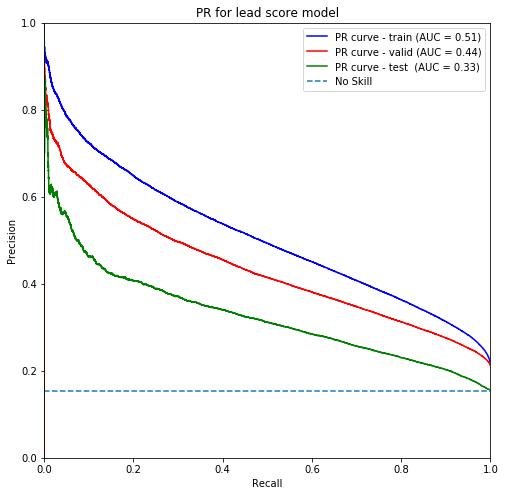

In [73]:
Loan_Modules.draw_PR(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

The model is above the no skill line for most thresholds

# Model Tuning - using Bayesian Optimization

In [ ]:
from bayes_opt import BayesianOptimization

train_x = df_train[feat]
train_y = df_train.loanstatus

xgtrain = xgb.DMatrix(train_x, label=train_y, missing = np.NAN)

def xgb_evaluate(eta,
                 max_depth,
                 min_child_weight,
                 colsample_bytree,
                 scale_pos_weight,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = eta
    params['max_depth'] = int(max_depth)   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['scale_pos_weight'] = scale_pos_weight
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False

    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=10000,
                       nfold=3,
                       metrics={'aucpr'}, #Area under PR curve
                       seed=1234,
                       callbacks=[xgb.callback.early_stop(50)])
    print(cv_result)

    return cv_result['test-aucpr-mean'].max()


xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'eta': (0.02, 0.4),
                              'max_depth': (3, 6),
                              'min_child_weight': (10, 30),
                              'colsample_bytree': (0.2, 0.8),
                              'scale_pos_weight': (2, 5),
                              'subsample': (0.5, 1),
                              'gamma': (0, 1)
                             }
                            )

xgb_BO.maximize(init_points=5, n_iter=40)

In [ ]:
xgb_BO_scores_df = pd.DataFrame()
for i, res in enumerate(xgb_BO.res):
    xgb_BO_scores = pd.DataFrame(res['params'], index=[i])
    xgb_BO_scores['score'] = res['target']
    xgb_BO_scores_df = pd.concat([xgb_BO_scores_df, xgb_BO_scores], axis=0)

In [ ]:
xgb_BO_scores_df = xgb_BO_scores_df.sort_values(by='score',ascending=False)
xgb_BO_scores_df.head(5)

In [74]:
%%time
# parameter set 1
params = {'objective': 'binary:logistic'
                  , 'booster': 'gbtree'
                  , 'eta': 0.07
                  , 'colsample_bytree': 0.22
                  , 'gamma': 0.023
                  , 'max_depth': 3 
                  , 'min_child_weight': 29
                  , 'scale_pos_weight': 2.39
                  , 'subsample': 0.83
                  , 'seed': 1234
                  , 'nthread': -1
                  , 'silence': 1
                  , 'eval_metric': 'aucpr'
                  }

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round=10000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

#[2848]	train-aucpr:0.466965 eval-aucpr:0.435129

[0]	train-aucpr:0.310069	eval-aucpr:0.307848
Multiple eval metrics have been passed: 'eval-aucpr' will be used for early stopping.

Will train until eval-aucpr hasn't improved in 50 rounds.
[1]	train-aucpr:0.336672	eval-aucpr:0.335014
[2]	train-aucpr:0.370892	eval-aucpr:0.368828
[3]	train-aucpr:0.385129	eval-aucpr:0.382587
[4]	train-aucpr:0.383207	eval-aucpr:0.380802
[5]	train-aucpr:0.387887	eval-aucpr:0.385263
[6]	train-aucpr:0.389226	eval-aucpr:0.38613
[7]	train-aucpr:0.389099	eval-aucpr:0.386288
[8]	train-aucpr:0.386607	eval-aucpr:0.383625
[9]	train-aucpr:0.387774	eval-aucpr:0.384659
[10]	train-aucpr:0.389093	eval-aucpr:0.386168
[11]	train-aucpr:0.390958	eval-aucpr:0.388172
[12]	train-aucpr:0.391368	eval-aucpr:0.388568
[13]	train-aucpr:0.392369	eval-aucpr:0.389582
[14]	train-aucpr:0.392093	eval-aucpr:0.389338
[15]	train-aucpr:0.390799	eval-aucpr:0.38797
[16]	train-aucpr:0.39152	eval-aucpr:0.38869
[17]	train-aucpr:0.391702	eval-aucpr:0.38901
[18]	train-aucpr:0.392541	eval-aucpr:0.389

[175]	train-aucpr:0.424051	eval-aucpr:0.417367
[176]	train-aucpr:0.424143	eval-aucpr:0.417453
[177]	train-aucpr:0.424178	eval-aucpr:0.417476
[178]	train-aucpr:0.42423	eval-aucpr:0.417516
[179]	train-aucpr:0.424296	eval-aucpr:0.417548
[180]	train-aucpr:0.424343	eval-aucpr:0.41757
[181]	train-aucpr:0.424383	eval-aucpr:0.417609
[182]	train-aucpr:0.424471	eval-aucpr:0.41768
[183]	train-aucpr:0.42451	eval-aucpr:0.417721
[184]	train-aucpr:0.42457	eval-aucpr:0.417767
[185]	train-aucpr:0.424615	eval-aucpr:0.417812
[186]	train-aucpr:0.424689	eval-aucpr:0.417899
[187]	train-aucpr:0.424756	eval-aucpr:0.417946
[188]	train-aucpr:0.42481	eval-aucpr:0.417978
[189]	train-aucpr:0.424855	eval-aucpr:0.41802
[190]	train-aucpr:0.42491	eval-aucpr:0.418054
[191]	train-aucpr:0.42502	eval-aucpr:0.418115
[192]	train-aucpr:0.425065	eval-aucpr:0.418135
[193]	train-aucpr:0.425118	eval-aucpr:0.418175
[194]	train-aucpr:0.425172	eval-aucpr:0.418231
[195]	train-aucpr:0.425205	eval-aucpr:0.418245
[196]	train-aucpr:0.42

[351]	train-aucpr:0.432386	eval-aucpr:0.423365
[352]	train-aucpr:0.432454	eval-aucpr:0.423439
[353]	train-aucpr:0.432496	eval-aucpr:0.42346
[354]	train-aucpr:0.432537	eval-aucpr:0.423498
[355]	train-aucpr:0.432583	eval-aucpr:0.423548
[356]	train-aucpr:0.432625	eval-aucpr:0.423554
[357]	train-aucpr:0.432658	eval-aucpr:0.423584
[358]	train-aucpr:0.432682	eval-aucpr:0.423603
[359]	train-aucpr:0.432743	eval-aucpr:0.423654
[360]	train-aucpr:0.432779	eval-aucpr:0.42368
[361]	train-aucpr:0.432819	eval-aucpr:0.423697
[362]	train-aucpr:0.432845	eval-aucpr:0.423709
[363]	train-aucpr:0.432895	eval-aucpr:0.423758
[364]	train-aucpr:0.432915	eval-aucpr:0.423772
[365]	train-aucpr:0.432964	eval-aucpr:0.423813
[366]	train-aucpr:0.432995	eval-aucpr:0.423838
[367]	train-aucpr:0.433012	eval-aucpr:0.423843
[368]	train-aucpr:0.433041	eval-aucpr:0.423887
[369]	train-aucpr:0.43307	eval-aucpr:0.423913
[370]	train-aucpr:0.433113	eval-aucpr:0.423961
[371]	train-aucpr:0.433168	eval-aucpr:0.424006
[372]	train-aucp

[527]	train-aucpr:0.437938	eval-aucpr:0.426918
[528]	train-aucpr:0.437959	eval-aucpr:0.426955
[529]	train-aucpr:0.437989	eval-aucpr:0.426967
[530]	train-aucpr:0.438016	eval-aucpr:0.426974
[531]	train-aucpr:0.438042	eval-aucpr:0.426981
[532]	train-aucpr:0.438063	eval-aucpr:0.426993
[533]	train-aucpr:0.43809	eval-aucpr:0.427017
[534]	train-aucpr:0.438119	eval-aucpr:0.427044
[535]	train-aucpr:0.438153	eval-aucpr:0.427065
[536]	train-aucpr:0.438183	eval-aucpr:0.427085
[537]	train-aucpr:0.438203	eval-aucpr:0.427097
[538]	train-aucpr:0.438266	eval-aucpr:0.427156
[539]	train-aucpr:0.438283	eval-aucpr:0.427155
[540]	train-aucpr:0.438307	eval-aucpr:0.42717
[541]	train-aucpr:0.438332	eval-aucpr:0.427186
[542]	train-aucpr:0.438351	eval-aucpr:0.427182
[543]	train-aucpr:0.438384	eval-aucpr:0.427206
[544]	train-aucpr:0.438413	eval-aucpr:0.427221
[545]	train-aucpr:0.438434	eval-aucpr:0.427224
[546]	train-aucpr:0.438481	eval-aucpr:0.427262
[547]	train-aucpr:0.438509	eval-aucpr:0.427277
[548]	train-auc

[703]	train-aucpr:0.44215	eval-aucpr:0.429278
[704]	train-aucpr:0.442171	eval-aucpr:0.429286
[705]	train-aucpr:0.442191	eval-aucpr:0.429301
[706]	train-aucpr:0.442212	eval-aucpr:0.429315
[707]	train-aucpr:0.442226	eval-aucpr:0.429334
[708]	train-aucpr:0.442236	eval-aucpr:0.429332
[709]	train-aucpr:0.442259	eval-aucpr:0.429339
[710]	train-aucpr:0.442274	eval-aucpr:0.429345
[711]	train-aucpr:0.442298	eval-aucpr:0.429351
[712]	train-aucpr:0.44232	eval-aucpr:0.429355
[713]	train-aucpr:0.442327	eval-aucpr:0.429353
[714]	train-aucpr:0.442337	eval-aucpr:0.429349
[715]	train-aucpr:0.442356	eval-aucpr:0.429365
[716]	train-aucpr:0.44238	eval-aucpr:0.429369
[717]	train-aucpr:0.4424	eval-aucpr:0.429392
[718]	train-aucpr:0.442417	eval-aucpr:0.429401
[719]	train-aucpr:0.442444	eval-aucpr:0.429419
[720]	train-aucpr:0.442465	eval-aucpr:0.429429
[721]	train-aucpr:0.442475	eval-aucpr:0.429433
[722]	train-aucpr:0.442487	eval-aucpr:0.429431
[723]	train-aucpr:0.442498	eval-aucpr:0.429431
[724]	train-aucpr:

[879]	train-aucpr:0.445283	eval-aucpr:0.430691
[880]	train-aucpr:0.44529	eval-aucpr:0.430693
[881]	train-aucpr:0.445304	eval-aucpr:0.430698
[882]	train-aucpr:0.445326	eval-aucpr:0.430707
[883]	train-aucpr:0.445372	eval-aucpr:0.430733
[884]	train-aucpr:0.445381	eval-aucpr:0.430738
[885]	train-aucpr:0.445394	eval-aucpr:0.430733
[886]	train-aucpr:0.445406	eval-aucpr:0.430736
[887]	train-aucpr:0.44543	eval-aucpr:0.430728
[888]	train-aucpr:0.44545	eval-aucpr:0.430737
[889]	train-aucpr:0.445471	eval-aucpr:0.430752
[890]	train-aucpr:0.445491	eval-aucpr:0.430777
[891]	train-aucpr:0.445503	eval-aucpr:0.430778
[892]	train-aucpr:0.445523	eval-aucpr:0.430771
[893]	train-aucpr:0.445545	eval-aucpr:0.430783
[894]	train-aucpr:0.445555	eval-aucpr:0.430781
[895]	train-aucpr:0.44557	eval-aucpr:0.430779
[896]	train-aucpr:0.445593	eval-aucpr:0.430779
[897]	train-aucpr:0.445614	eval-aucpr:0.430764
[898]	train-aucpr:0.445626	eval-aucpr:0.430782
[899]	train-aucpr:0.445643	eval-aucpr:0.430795
[900]	train-aucpr

[1054]	train-aucpr:0.447976	eval-aucpr:0.431594
[1055]	train-aucpr:0.447997	eval-aucpr:0.431601
[1056]	train-aucpr:0.448002	eval-aucpr:0.431611
[1057]	train-aucpr:0.448012	eval-aucpr:0.431606
[1058]	train-aucpr:0.448034	eval-aucpr:0.431624
[1059]	train-aucpr:0.448052	eval-aucpr:0.431632
[1060]	train-aucpr:0.44806	eval-aucpr:0.431638
[1061]	train-aucpr:0.448074	eval-aucpr:0.431638
[1062]	train-aucpr:0.448103	eval-aucpr:0.431643
[1063]	train-aucpr:0.448129	eval-aucpr:0.431667
[1064]	train-aucpr:0.448149	eval-aucpr:0.431681
[1065]	train-aucpr:0.44816	eval-aucpr:0.43168
[1066]	train-aucpr:0.448184	eval-aucpr:0.431702
[1067]	train-aucpr:0.448195	eval-aucpr:0.431705
[1068]	train-aucpr:0.44821	eval-aucpr:0.431711
[1069]	train-aucpr:0.44822	eval-aucpr:0.431708
[1070]	train-aucpr:0.448242	eval-aucpr:0.431718
[1071]	train-aucpr:0.448252	eval-aucpr:0.431729
[1072]	train-aucpr:0.448275	eval-aucpr:0.431727
[1073]	train-aucpr:0.448295	eval-aucpr:0.431742
[1074]	train-aucpr:0.448303	eval-aucpr:0.4317

[1226]	train-aucpr:0.450286	eval-aucpr:0.432391
[1227]	train-aucpr:0.450296	eval-aucpr:0.432392
[1228]	train-aucpr:0.450307	eval-aucpr:0.432392
[1229]	train-aucpr:0.450312	eval-aucpr:0.432391
[1230]	train-aucpr:0.450326	eval-aucpr:0.432396
[1231]	train-aucpr:0.45034	eval-aucpr:0.432412
[1232]	train-aucpr:0.450345	eval-aucpr:0.432417
[1233]	train-aucpr:0.450353	eval-aucpr:0.432411
[1234]	train-aucpr:0.450371	eval-aucpr:0.432418
[1235]	train-aucpr:0.450378	eval-aucpr:0.432426
[1236]	train-aucpr:0.450377	eval-aucpr:0.432428
[1237]	train-aucpr:0.450381	eval-aucpr:0.432428
[1238]	train-aucpr:0.450391	eval-aucpr:0.432432
[1239]	train-aucpr:0.450409	eval-aucpr:0.432453
[1240]	train-aucpr:0.450432	eval-aucpr:0.432463
[1241]	train-aucpr:0.45044	eval-aucpr:0.432461
[1242]	train-aucpr:0.450472	eval-aucpr:0.432473
[1243]	train-aucpr:0.450488	eval-aucpr:0.432472
[1244]	train-aucpr:0.45051	eval-aucpr:0.432479
[1245]	train-aucpr:0.450522	eval-aucpr:0.43248
[1246]	train-aucpr:0.450531	eval-aucpr:0.432

[1398]	train-aucpr:0.452445	eval-aucpr:0.432893
[1399]	train-aucpr:0.452453	eval-aucpr:0.432904
[1400]	train-aucpr:0.452466	eval-aucpr:0.432898
[1401]	train-aucpr:0.452479	eval-aucpr:0.4329
[1402]	train-aucpr:0.452493	eval-aucpr:0.432897
[1403]	train-aucpr:0.452507	eval-aucpr:0.4329
[1404]	train-aucpr:0.452519	eval-aucpr:0.43291
[1405]	train-aucpr:0.452539	eval-aucpr:0.432921
[1406]	train-aucpr:0.452542	eval-aucpr:0.432921
[1407]	train-aucpr:0.452563	eval-aucpr:0.432945
[1408]	train-aucpr:0.452577	eval-aucpr:0.43295
[1409]	train-aucpr:0.452578	eval-aucpr:0.432948
[1410]	train-aucpr:0.452591	eval-aucpr:0.432951
[1411]	train-aucpr:0.452609	eval-aucpr:0.432956
[1412]	train-aucpr:0.452624	eval-aucpr:0.43296
[1413]	train-aucpr:0.452641	eval-aucpr:0.432959
[1414]	train-aucpr:0.452647	eval-aucpr:0.432955
[1415]	train-aucpr:0.452657	eval-aucpr:0.432957
[1416]	train-aucpr:0.452669	eval-aucpr:0.432958
[1417]	train-aucpr:0.45269	eval-aucpr:0.432972
[1418]	train-aucpr:0.452707	eval-aucpr:0.432977


[1570]	train-aucpr:0.45446	eval-aucpr:0.433374
[1571]	train-aucpr:0.454465	eval-aucpr:0.433375
[1572]	train-aucpr:0.454474	eval-aucpr:0.433384
[1573]	train-aucpr:0.454488	eval-aucpr:0.433381
[1574]	train-aucpr:0.454496	eval-aucpr:0.433385
[1575]	train-aucpr:0.45451	eval-aucpr:0.433389
[1576]	train-aucpr:0.454533	eval-aucpr:0.433394
[1577]	train-aucpr:0.454542	eval-aucpr:0.433395
[1578]	train-aucpr:0.454551	eval-aucpr:0.433385
[1579]	train-aucpr:0.454568	eval-aucpr:0.433403
[1580]	train-aucpr:0.454576	eval-aucpr:0.43341
[1581]	train-aucpr:0.454601	eval-aucpr:0.433407
[1582]	train-aucpr:0.45461	eval-aucpr:0.433409
[1583]	train-aucpr:0.454624	eval-aucpr:0.433417
[1584]	train-aucpr:0.454636	eval-aucpr:0.433436
[1585]	train-aucpr:0.454642	eval-aucpr:0.433439
[1586]	train-aucpr:0.45466	eval-aucpr:0.433458
[1587]	train-aucpr:0.454668	eval-aucpr:0.433456
[1588]	train-aucpr:0.454671	eval-aucpr:0.433453
[1589]	train-aucpr:0.454685	eval-aucpr:0.433456
[1590]	train-aucpr:0.454702	eval-aucpr:0.4334

[1742]	train-aucpr:0.456431	eval-aucpr:0.433829
[1743]	train-aucpr:0.456444	eval-aucpr:0.433831
[1744]	train-aucpr:0.456447	eval-aucpr:0.433833
[1745]	train-aucpr:0.456454	eval-aucpr:0.433836
[1746]	train-aucpr:0.456467	eval-aucpr:0.43383
[1747]	train-aucpr:0.456477	eval-aucpr:0.433836
[1748]	train-aucpr:0.456495	eval-aucpr:0.433848
[1749]	train-aucpr:0.456501	eval-aucpr:0.433848
[1750]	train-aucpr:0.456509	eval-aucpr:0.433844
[1751]	train-aucpr:0.456517	eval-aucpr:0.433848
[1752]	train-aucpr:0.456529	eval-aucpr:0.433856
[1753]	train-aucpr:0.456539	eval-aucpr:0.433852
[1754]	train-aucpr:0.456552	eval-aucpr:0.433859
[1755]	train-aucpr:0.456557	eval-aucpr:0.433868
[1756]	train-aucpr:0.456566	eval-aucpr:0.433873
[1757]	train-aucpr:0.456578	eval-aucpr:0.433876
[1758]	train-aucpr:0.456591	eval-aucpr:0.43388
[1759]	train-aucpr:0.4566	eval-aucpr:0.433884
[1760]	train-aucpr:0.456609	eval-aucpr:0.433881
[1761]	train-aucpr:0.456613	eval-aucpr:0.433879
[1762]	train-aucpr:0.456624	eval-aucpr:0.433

[1914]	train-aucpr:0.458165	eval-aucpr:0.434074
[1915]	train-aucpr:0.458167	eval-aucpr:0.434076
[1916]	train-aucpr:0.458176	eval-aucpr:0.434089
[1917]	train-aucpr:0.458183	eval-aucpr:0.434092
[1918]	train-aucpr:0.458201	eval-aucpr:0.434109
[1919]	train-aucpr:0.45821	eval-aucpr:0.434106
[1920]	train-aucpr:0.458223	eval-aucpr:0.434109
[1921]	train-aucpr:0.45823	eval-aucpr:0.434108
[1922]	train-aucpr:0.458233	eval-aucpr:0.434105
[1923]	train-aucpr:0.458272	eval-aucpr:0.434118
[1924]	train-aucpr:0.458284	eval-aucpr:0.434121
[1925]	train-aucpr:0.4583	eval-aucpr:0.434119
[1926]	train-aucpr:0.458305	eval-aucpr:0.434127
[1927]	train-aucpr:0.45832	eval-aucpr:0.434132
[1928]	train-aucpr:0.458321	eval-aucpr:0.434132
[1929]	train-aucpr:0.458322	eval-aucpr:0.434126
[1930]	train-aucpr:0.458338	eval-aucpr:0.43413
[1931]	train-aucpr:0.458351	eval-aucpr:0.434138
[1932]	train-aucpr:0.458363	eval-aucpr:0.434139
[1933]	train-aucpr:0.458369	eval-aucpr:0.434136
[1934]	train-aucpr:0.458379	eval-aucpr:0.43414

# Validate on test data

Area under the PR curve - train: 0.458450
Area under the PR curve - validation: 0.434164
Area under the PR curve - test: 0.322701


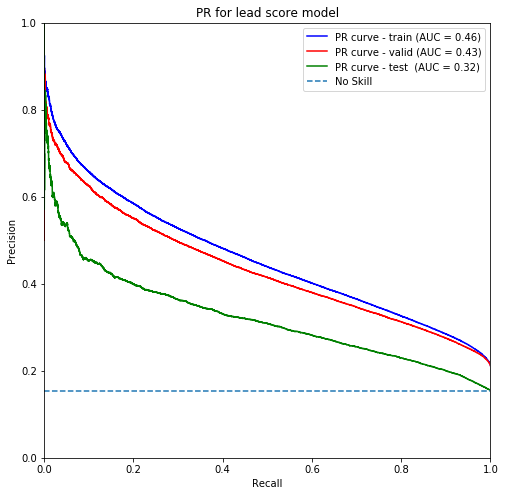

In [84]:
Loan_Modules.draw_PR(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

In [85]:
y_pred = gbm.predict(dtest)
y_pred

array([0.47129914, 0.37414634, 0.35991368, ..., 0.56268483, 0.2951458 ,
       0.37951913], dtype=float32)

In [86]:
print('max predicted value: {:.2f} \nmin predicted value: {:.2f} \navg predicted value: {:.2f}'.format(y_pred.max(), y_pred.min(), y_pred.mean()))

max predicted value: 0.96 
min predicted value: 0.00 
avg predicted value: 0.35


In [87]:
predicted_value = [1 if pred > 0.5 else 0 for pred in y_pred]

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85     50035
         1.0       0.32      0.47      0.38      9148

    accuracy                           0.76     59183
   macro avg       0.61      0.64      0.62     59183
weighted avg       0.80      0.76      0.78     59183



Model needs improvement on class 1 (low precision and recall)

In [89]:
importance=gbm.get_fscore()

In [90]:
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [91]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
19,intrate,0.048589
14,emptitle_chargeoff_pct,0.031937
9,dti,0.028895
31,annualinc,0.026158
28,installment,0.022584
27,totalrevhilim,0.022204
4,maxbalbc,0.021976
7,totcurbal,0.021671
6,loanamnt,0.021595
45,diff_crline_issue,0.019618


<Figure size 2304x2304 with 0 Axes>

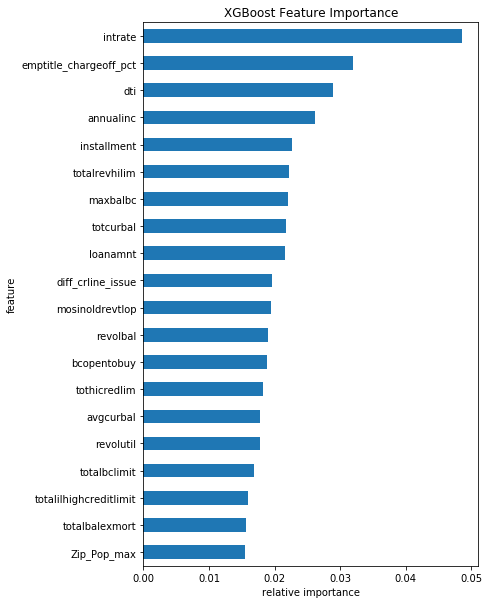

In [92]:
plt.figure(figsize=(32, 32))

df_importance[:20].sort_values(['fscore'], ascending=True).plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')

plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

- **intrate:** interest rate on the loan 
- **emptitle_chargeoff_pct** avg. charged-off rate per emptitle 
- **dti:** debt-to-income ratio
- **annualinc** annual income
- **installment:** the monthly payment owed by the borrower if the loan originates
- **totalrevhilim:** total revolving high credit/credit limit
- **maxbalbc:** maximum current balance owed on all revolving accounts
- **totalcurbal:** total current balance
- **loanamnt:** the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **diff_crline_issue:** days between issued date and earliest credit line
- **mosinoldrevtlop:** months since oldest revolving account opened
- **revolbal:** revolving balance
- **bcopentobuy:** total open to buy on revolving bankcards
- **tothicredlim:** total high credit/credit limit
- **avgcurbal:** average current balance of all accounts
- **revolutil:** the amount of credit the borrower is using relative to all available revolving credit
- **totalbclimit:** total bankcard high credit/credit limit
- **totalilhighcreditlimit:** total installment high credit/credit limit
- **tothicredlim:** total high credit/credit limit
- **totalbalexmort:** total credit balance excluding mortgage.
- **zip_pop_max:** max population per zip code

The above important features with imbalanced dataset is very similar to the ones in the balanced dataset model

# Compare Feature Importance to Insights from EDA

![title](EDA_cat.png)

![title](EDA_cont.png)

Based on the EDA in Feature Engineering section above, 
- It is obvious that the interest rate on the loan (intrate), debt-to-income ratio(dti), the monthly payment owed by the borrower if the loan originates　(isntallment), the amount of credit the borrower is using relative to all available revolving credit(revolutil), months since most recent installment accounts opened(mthssincercntil) number of revolving trades with balance > 0 (numrevtlbalgt0) and 60 months term **->** the higher default (charged off) rate
- It is obvious that the lower the months since oldest revolving account opened(mosinoldrevtlop), average current balance of all accounts (avgcurbal), total revolving high credit/credit limit (totalrevhilim), months since oldest installment account opened (mosinoldilacct) **->** the higher default (charged off) rate 

All of the above features were selected by the model as important features and by comparining them to the EDA graph, they show obvious correlation with the default (charged off) rate and the trend all make intuitive business sense. <br>

Note that the **emptitle_chargeoff_pct** created during the feature engineering process is selected as the second most important feature. It also boost the model performance by 10% from F1-score of 0.62 to 0.69. The **diff_crline_issue**, and the **zip_pop_max** are also important features.<br>


- However, maximum current balance owed on all revolving accounts (maxbalbc) total current balance to high credit/credit limit on all install acct (ilutil), were selected by the model as important features but do not obvious correlation with the default (charged off) rate based on the EDA graph (maybe their effect become more prominent when interacting with other features). 

# Predict

In [93]:
dpred = xgb.DMatrix(df_pred[feat])

In [94]:
predictions = gbm.predict(data=dpred)

In [95]:
pred_converted = []
for pred in predictions:
    pred_converted.append(1 if pred > 0.5 else 0)

**18% of loans is charged off vs fully paid, which is lower than historical average (25%)**

In [96]:
chargeOff_rate = float(sum(pred_converted)/len(pred_converted))
print ('The predicted charged off rate for the current loans: {:.2f}'.format(chargeOff_rate))

The predicted charged off rate for the current loans: 0.18


In [105]:
list(range(59183, 59183+len(pred_converted)))

33

In [103]:
len(pred_converted)

33

In [106]:
df_pred.loc[:, 'loan_status_predicted'], df_pred.loc[:, 'id'] = pred_converted, list(range(59183, 59183+len(pred_converted))) #data[59183:]['id']

Save predictions for current loans

In [107]:
df_pred.to_csv('predictions_2020_current.csv')

# Save Model

In [108]:
import pickle

In [109]:
with open('model.pkl','wb') as pkl_file:
    pickle.dump(gbm, pkl_file)

In [110]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima.joblib.dat")

/home/yingjie/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['pima.joblib.dat']